In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data0 = pd.read_csv('1996数据.csv', index_col = None)
data0.head(2)

,formation energy,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mode GSbandgap,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,-3.105,56,51,14.000000,12.000000,8,9,87,78,71.571429,...,0.0,0.0,0.0,0.0,12,229,217,87.000000,85.714286,12
1,-2.819,8,5,6.444444,1.728395,8,1,87,86,72.444444,...,0.0,0.0,0.0,0.0,12,229,217,87.444444,83.827160,12


In [4]:
data_corresponding = data0.corr()['formation energy'].abs().sort_values(ascending=False)[:11]
data_corresponding

formation energy                        1.000000
MagpieData avg_dev Electronegativity    0.815389
MagpieData range Electronegativity      0.783312
MagpieData maximum Electronegativity    0.744592
MagpieData mode Electronegativity       0.713979
MagpieData mean SpaceGroupNumber        0.619982
MagpieData mode SpaceGroupNumber        0.619132
MagpieData mean Electronegativity       0.618487
MagpieData mean NdValence               0.607465
MagpieData range CovalentRadius         0.589045
MagpieData range SpaceGroupNumber       0.584285
Name: formation energy, dtype: float64

In [5]:
import matplotlib.pyplot as plt

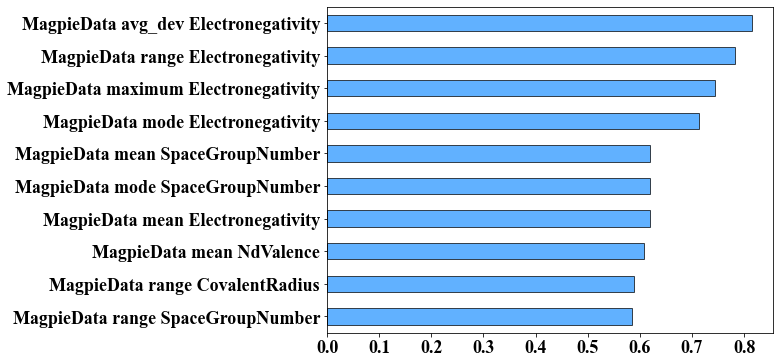

In [6]:
sorted_data = data_corresponding.drop('formation energy').sort_values(ascending=True)  # 注意这里的排序方式
sorted_data.plot(kind='barh', alpha=0.7, color = 'dodgerblue', edgecolor = 'k',figsize=(8, 6))
plt.xticks(fontproperties='Times New Roman', fontsize=18, weight='bold')
plt.yticks(fontproperties='Times New Roman', fontsize=18, weight='bold')
plt.savefig('a03.png', dpi=600, format='png', bbox_inches='tight')
plt.show()

In [11]:
y = data0['formation energy'].values
excluded = ['formation energy']
X = data0.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 103 possible dedscriptor:

['MagpieData maximum Number' 'MagpieData range Number'
 'MagpieData mean Number' 'MagpieData avg_dev Number'
 'MagpieData mode Number' 'MagpieData minimum MendeleevNumber'
 'MagpieData maximum MendeleevNumber' 'MagpieData range MendeleevNumber'
 'MagpieData mean MendeleevNumber' 'MagpieData avg_dev MendeleevNumber'
 'MagpieData mode MendeleevNumber' 'MagpieData minimum AtomicWeight'
 'MagpieData maximum AtomicWeight' 'MagpieData range AtomicWeight'
 'MagpieData mean AtomicWeight' 'MagpieData avg_dev AtomicWeight'
 'MagpieData mode AtomicWeight' 'MagpieData minimum MeltingT'
 'MagpieData maximum MeltingT' 'MagpieData range MeltingT'
 'MagpieData mean MeltingT' 'MagpieData avg_dev MeltingT'
 'MagpieData mode MeltingT' 'MagpieData minimum Column'
 'MagpieData maximum Column' 'MagpieData range Column'
 'MagpieData mean Column' 'MagpieData avg_dev Column'
 'MagpieData mode Column' 'MagpieData range Row' 'MagpieData mean Row'
 'MagpieData avg_dev Row' 'Ma

In [12]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 8)

In [13]:
#import warnings
#warnings.filterwarnings("ignore")

#param_grid = {'n_estimators': [20, 50, 80, 100],
#              'max_features': ['sqrt'],
#              'min_samples_split': range(1, 5),
#              'min_samples_leaf': range(1, 5)}
##kfold = StratifiedKFold(n_splits = 10, shuffle=True,
##                        random_state = 12) ### 回归算法交叉验证不需要分层
#model_kf = GridSearchCV(RandomForestRegressor(random_state = 87),
#                     param_grid, cv = crossvalidation, return_train_score=False)

#model_kf.fit(X_train, y_train)

In [14]:
#df_hyper_kf = pd.DataFrame(model_kf.cv_results_)

In [15]:
#df_hyper_kf
##pd.set_option('display.max_rows', 6)
#df_hyper_kf[['params', 'mean_test_score']]

In [16]:
#df_hyper_kf
##pd.set_option('display.max_rows', 6)
#df_hyper_kf[['params', 'mean_test_score']]

In [17]:
#model_kf.best_score_

In [18]:
#model_kf.best_params_

In [19]:
model_RFR = RandomForestRegressor(random_state=55, max_features= 'sqrt',
                                  min_samples_leaf= 1, min_samples_split= 3, 
                                  n_estimators= 50)
r2_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'r2',
                                cv = crossvalidation)
rmse_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'neg_root_mean_squared_error',
                                  cv = crossvalidation)
MAE_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring='neg_mean_absolute_error',
                                 cv = crossvalidation)

print()
print('RFR train magmom Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_RFR), np.mean(r2_scores_RFR)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_RFR), -np.mean(rmse_scores_RFR)))
print('Folds: %i, mean MAE: %3f' % (len(MAE_scores_RFR), -np.mean(MAE_scores_RFR)))
print()

RFR_test = model_RFR.fit(X_train, y_train)
y_RFR_predict = model_RFR.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_RFR_test = r2_score(y_test, y_RFR_predict)
rmse_scores_RFR_test = np.sqrt(mean_squared_error(y_test, y_RFR_predict))
mae_scores_RFR_test = mean_absolute_error(y_test, y_RFR_predict)

print()
print('RFR predict magmom results:')
print('mean R2: %3f' % (r2_scores_RFR_test))
print('mean RMSE: %3f' % (rmse_scores_RFR_test))
print('mean MAE: %3f' % (mae_scores_RFR_test))
print()


RFR train magmom Cross-validation results:
Folds: 10, mean R2: 0.929042
Folds: 10, mean RMSE: 0.259621
Folds: 10, mean MAE: 0.180198


RFR predict magmom results:
mean R2: 0.924491
mean RMSE: 0.289281
mean MAE: 0.185198



In [20]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [21]:
explainer = shap.Explainer(model_RFR)
shap_values = explainer.shap_values(X)
print(shap_values[1].shape)check_additivity=False

(103,)


In [29]:
explainer = shap.Explainer(model_RFR, X , check_additivity=False)
shap_values = explainer(X , check_additivity=False)

 94%|=================== | 998/1065 [00:11<00:00]       

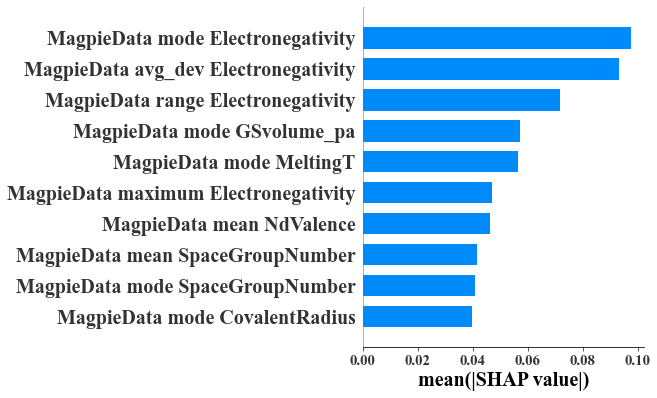

In [32]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10,show = False)
plt.xticks( fontproperties='Times New Roman', fontsize=15, weight='bold') #设置x坐标字体和大小
plt.yticks(fontproperties='Times New Roman', fontsize=20, weight='bold') #设置y坐标字体和大小
plt.xlabel('mean(|SHAP value|)', fontproperties='Times New Roman',
           fontsize=20, weight='bold')#设置x轴标签和大小
plt.savefig('a.png', dpi=600,format = 'png',bbox_inches='tight')
plt.grid(False)
plt.show()

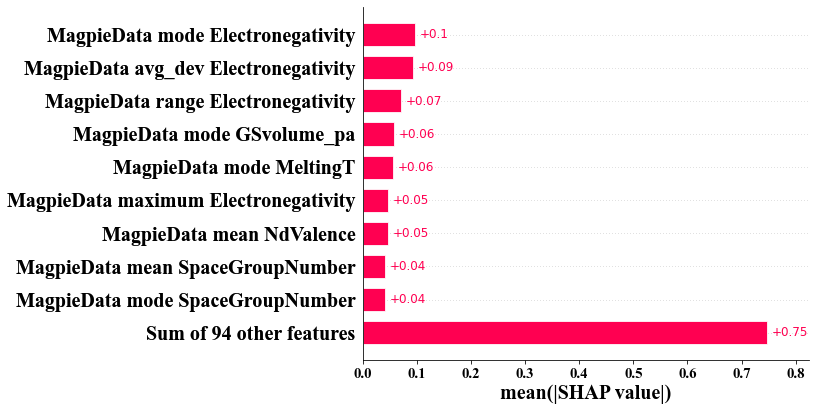

In [33]:
shap.plots.bar(shap_values,show = False)
plt.xticks( fontproperties='Times New Roman', fontsize=15, weight='bold') #设置x坐标字体和大小
plt.yticks(fontproperties='Times New Roman', fontsize=20, weight='bold') #设置y坐标字体和大小
plt.xlabel('mean(|SHAP value|)', fontproperties='Times New Roman',
           fontsize=20, weight='bold')#设置x轴标签和大小
plt.savefig('asd.png', dpi=600,format = 'png',bbox_inches='tight')

In [34]:
explainer.shap_values(X,check_additivity=False)

 98%|===================| 1048/1065 [00:11<00:00]       

array([[-0.00073408, -0.00255215, -0.00411362, ..., -0.05000151,
        -0.00240952, -0.03765595],
       [-0.00309474,  0.000433  ,  0.00986592, ..., -0.04319052,
        -0.00079638, -0.04814749],
       [-0.00031882, -0.00213987,  0.00543112, ..., -0.04733241,
        -0.00028546, -0.04211001],
       ...,
       [-0.00082132, -0.00111148, -0.00318462, ..., -0.05231152,
        -0.01121652, -0.0071155 ],
       [ 0.00143013,  0.00253589,  0.00484658, ..., -0.01403087,
         0.009611  ,  0.04908144],
       [ 0.00341714,  0.00098302, -0.00299614, ...,  0.01418033,
        -0.0007902 , -0.02882456]])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


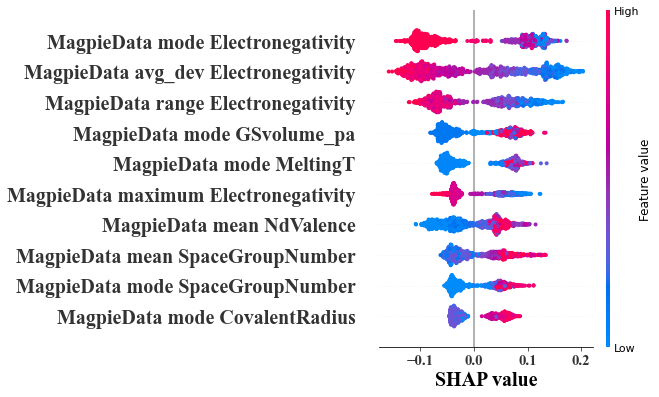

In [35]:
shap.summary_plot(shap_values,max_display = 10,show = False)
plt.xticks( fontproperties='Times New Roman', fontsize=15, weight='bold') #设置x坐标字体和大小
plt.yticks(fontproperties='Times New Roman', fontsize=20, weight='bold') #设置y坐标字体和大小
plt.xlabel('SHAP value', fontproperties='Times New Roman',
           fontsize=20, weight='bold')#设置x轴标签和大小
plt.savefig('12345.png', dpi=600,format = 'png',bbox_inches='tight')

In [37]:
explainer.shap_values(X , check_additivity=False)

100%|===================| 1063/1065 [00:12<00:00]       

array([[-0.00073408, -0.00255215, -0.00411362, ..., -0.05000151,
        -0.00240952, -0.03765595],
       [-0.00309474,  0.000433  ,  0.00986592, ..., -0.04319052,
        -0.00079638, -0.04814749],
       [-0.00031882, -0.00213987,  0.00543112, ..., -0.04733241,
        -0.00028546, -0.04211001],
       ...,
       [-0.00082132, -0.00111148, -0.00318462, ..., -0.05231152,
        -0.01121652, -0.0071155 ],
       [ 0.00143013,  0.00253589,  0.00484658, ..., -0.01403087,
         0.009611  ,  0.04908144],
       [ 0.00341714,  0.00098302, -0.00299614, ...,  0.01418033,
        -0.0007902 , -0.02882456]])

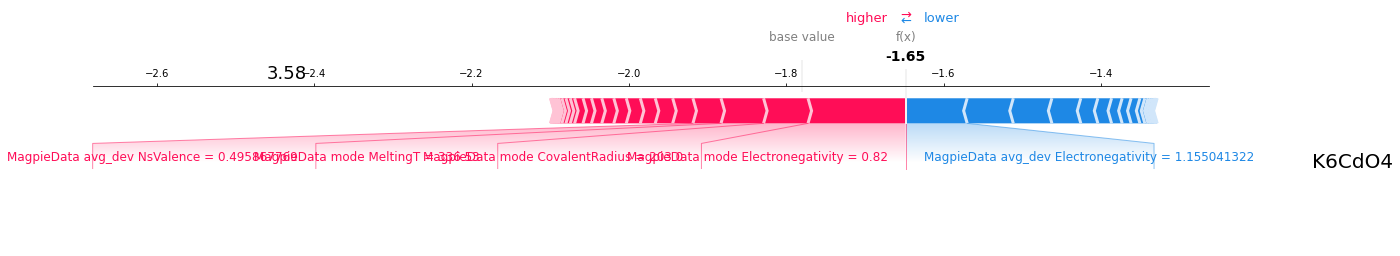

In [38]:
shap.plots.force(shap_values[690,12:55], X.iloc[690,:],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()

# 修改标题的字体大小
fig.suptitle('3.58', fontsize=60)
fig.texts[0].set_x(0.26)
 

# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(1, 0.5, 'K6CdO4', ha='center', fontsize=20) 
plt.savefig("四元.jpg", dpi=1000, bbox_inches='tight') #可以保存图片

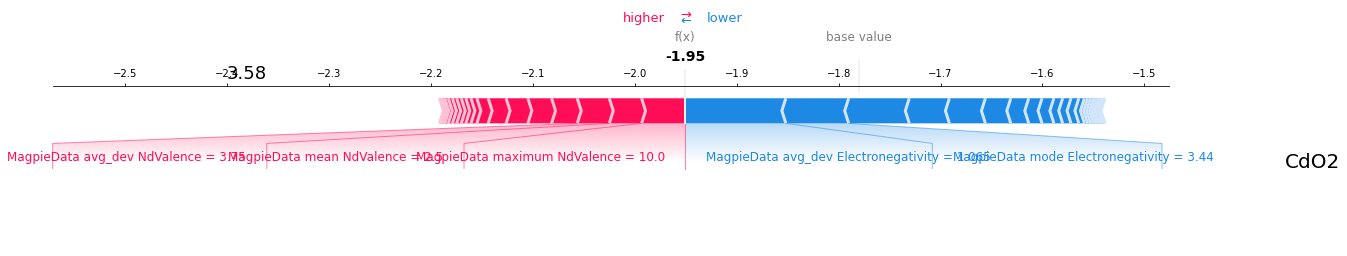

In [41]:
shap.plots.force(shap_values[1064,12:55], X.iloc[1064,12:55],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()

# 修改标题的字体大小
fig.suptitle('3.58', fontsize=60)
fig.texts[0].set_x(0.26)
 

# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(1, 0.5, 'CdO2', ha='center', fontsize=20) 
plt.savefig("四元.jpg", dpi=1000, bbox_inches='tight') #可以保存图片

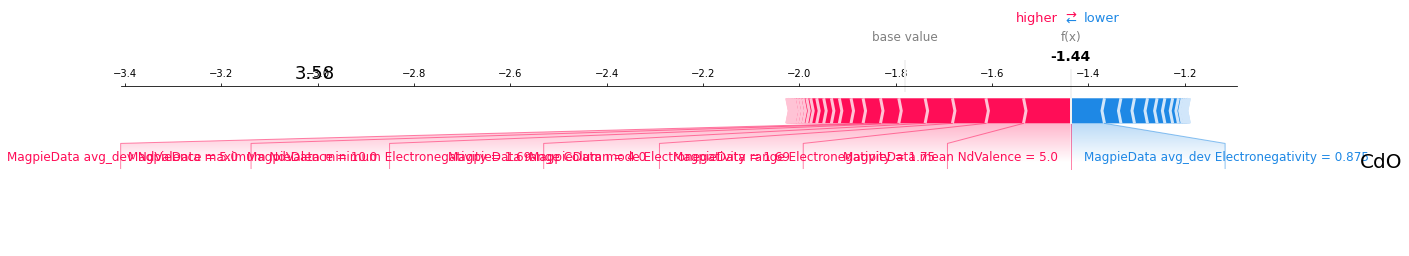

In [42]:
shap.plots.force(shap_values[695,12:55], X.iloc[695,:],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()

# 修改标题的字体大小
fig.suptitle('3.58', fontsize=60)
fig.texts[0].set_x(0.26)
 

# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(1, 0.5, 'CdO', ha='center', fontsize=20) 
plt.savefig("四元.jpg", dpi=1000, bbox_inches='tight') #可以保存图片